In [7]:
# include needed files
include("all_code/code_needed.jl")
include("all_code/methods.jl")
;

In [12]:
# generate data
n = 500
A = sparse(erdos_renyi_undirected(n,0.2))
mytriangles = triangles(A)
z = collect(mytriangles)
ei,ej,ek = unzip_triangles(z)
@show length(z)
length(z) == sum(Diagonal(A^3))/6

length(z) = 171420


true

In [173]:
# prepare data for experiment
tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
@show length(ei)
n = size(A,1)
myalpha = 0.8
t = 15.0
CAtrain = collapse_network(Atrain)

length(ei) = 20177


250500×250500 SparseMatrixCSC{Int64,Int64} with 1053360 stored entries:
  [250019,      3]  =  1
  [250036,      3]  =  1
  [250092,      3]  =  1
  [250101,      3]  =  1
  [250102,      3]  =  1
  [250114,      3]  =  1
  [250214,      3]  =  1
  [250221,      3]  =  1
  [250253,      3]  =  1
  [250275,      3]  =  1
  [250278,      3]  =  1
  [250285,      3]  =  1
  ⋮
  [248004, 250500]  =  1
  [248027, 250500]  =  1
  [248214, 250500]  =  1
  [248222, 250500]  =  1
  [248255, 250500]  =  1
  [248287, 250500]  =  1
  [248294, 250500]  =  1
  [248319, 250500]  =  1
  [248326, 250500]  =  1
  [248338, 250500]  =  1
  [248365, 250500]  =  1
  [248469, 250500]  =  1

In [243]:
nbexps = 50
expids = sample_experiment_ids(nbexps,length(ei))
AUC = zeros(nbexps,11)
for curexp = 1:nbexps
    @show curexp
    i = expids[curexp]
    v1 = ei[i]
    v2 = ej[i]
    xd_hk,xs1_hk,xs2_hk = double_seed(Atrain,v1,v2,t,"hk")
    xd_pr,xs1_pr,xs2_pr = double_seed(Atrain,v1,v2,myalpha,"pr")
    xcollapse1_hk,xcollapse2_hk = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"hk",t)
    xcollapse1_pr,xcollapse2_pr = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"pr",myalpha)
    xalternate = pairseed_alternate(Atrain,v1,v2,myalpha,10)
    
    # ground truth solution
    tris = unzip_triangles(collect(triangles(A,v1)))
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc = calc_AUC_new(xref,xd_hk); AUC[curexp,1] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_hk); AUC[curexp,2] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_hk); AUC[curexp,3] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xd_pr); AUC[curexp,4] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_pr); AUC[curexp,5] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_pr); AUC[curexp,6] = auc
    sum(xcollapse1_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_hk)[3]; AUC[curexp,7] = auc
    sum(xcollapse2_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_hk)[3]; AUC[curexp,8] = auc
    sum(xcollapse1_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_pr)[3]; AUC[curexp,9] = auc
    sum(xcollapse2_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_pr)[3]; AUC[curexp,10] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xalternate); AUC[curexp,11] = auc
end

curexp = 1


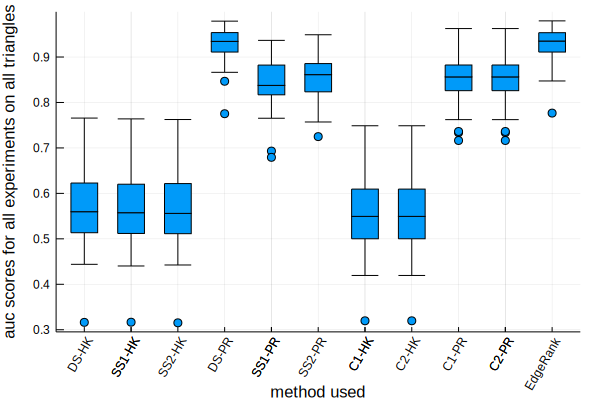

In [73]:
aucvals
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],aucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [250]:
nbexps = 20
expids = sample_experiment_ids(nbexps,length(ei))
AUC = zeros(nbexps,11)
for curexp = 1:nbexps
    @show curexp
    i = expids[curexp]
    v1 = ei[i]
    v2 = ej[i]
    xd_hk,xs1_hk,xs2_hk = double_seed(Atrain,v1,v2,t,"hk")
    xd_pr,xs1_pr,xs2_pr = double_seed(Atrain,v1,v2,myalpha,"pr")
    xcollapse1_hk,xcollapse2_hk = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"hk",t)
    xcollapse1_pr,xcollapse2_pr = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"pr",myalpha)
    xalternate = pairseed_alternate(Atrain,v1,v2,myalpha,10)
    
    # ground truth solution
    xref = (Atest[:,v1].*Atest[:,v2])
    
    tpr,fpr,auc = calc_AUC_new(xref,xd_hk); AUC[curexp,1] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_hk); AUC[curexp,2] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_hk); AUC[curexp,3] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xd_pr); AUC[curexp,4] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_pr); AUC[curexp,5] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_pr); AUC[curexp,6] = auc
    sum(xcollapse1_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_hk)[3]; AUC[curexp,7] = auc
    sum(xcollapse2_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_hk)[3]; AUC[curexp,8] = auc
    sum(xcollapse1_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_pr)[3]; AUC[curexp,9] = auc
    sum(xcollapse2_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_pr)[3]; AUC[curexp,10] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xalternate); AUC[curexp,11] = auc
end

curexp = 1
curexp = 2
curexp = 3
curexp = 4
curexp = 5
curexp = 6
curexp = 7
curexp = 8
curexp = 9
curexp = 10
curexp = 11
curexp = 12
curexp = 13
curexp = 14
curexp = 15
curexp = 16
curexp = 17
curexp = 18
curexp = 19
curexp = 20


In [257]:
curids = findall(isnan.(AUC[:,1]).==false)

11-element Array{Int64,1}:
  1
  2
  3
  4
  6
  8
 12
 14
 17
 18
 19

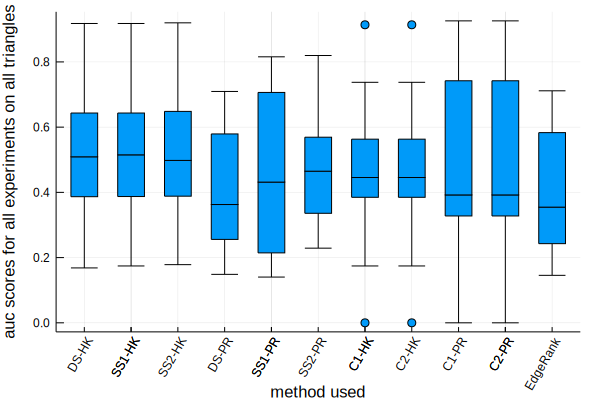

In [258]:
curaucvals = AUC[curids,:]
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],curaucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [268]:
nbexps = 20
expids = sample_experiment_ids(nbexps,length(ei))
AUC = zeros(nbexps,11)
for curexp = 1:nbexps
    @show curexp
    i = expids[curexp]
    v1 = ei[i]
    v2 = ej[i]
    xd_hk,xs1_hk,xs2_hk = double_seed(Atrain,v1,v2,t,"hk")
    xd_pr,xs1_pr,xs2_pr = double_seed(Atrain,v1,v2,myalpha,"pr")
    xcollapse1_hk,xcollapse2_hk = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"hk",t)
    xcollapse1_pr,xcollapse2_pr = pairseed_on_collapsed_network(CAtrain,n,v1,v2,"pr",myalpha)
    xalternate = pairseed_alternate(Atrain,v1,v2,myalpha,10)
    
    # ground truth solution
    xref = (Atest[:,v1].+Atest[:,v2])
    xref[findall(xref.==2)] .= 1
    
    tpr,fpr,auc = calc_AUC_new(xref,xd_hk); AUC[curexp,1] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_hk); AUC[curexp,2] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_hk); AUC[curexp,3] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xd_pr); AUC[curexp,4] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs1_pr); AUC[curexp,5] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xs2_pr); AUC[curexp,6] = auc
    sum(xcollapse1_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_hk)[3]; AUC[curexp,7] = auc
    sum(xcollapse2_hk) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_hk)[3]; AUC[curexp,8] = auc
    sum(xcollapse1_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse1_pr)[3]; AUC[curexp,9] = auc
    sum(xcollapse2_pr) == 0 ? auc = 0 : auc = calc_AUC_new(xref,xcollapse2_pr)[3]; AUC[curexp,10] = auc
    tpr,fpr,auc = calc_AUC_new(xref,xalternate); AUC[curexp,11] = auc
end

curexp = 1
curexp = 2
curexp = 3
curexp = 4
curexp = 5
curexp = 6
curexp = 7
curexp = 8
curexp = 9
curexp = 10
curexp = 11
curexp = 12
curexp = 13
curexp = 14
curexp = 15
curexp = 16
curexp = 17
curexp = 18
curexp = 19
curexp = 20


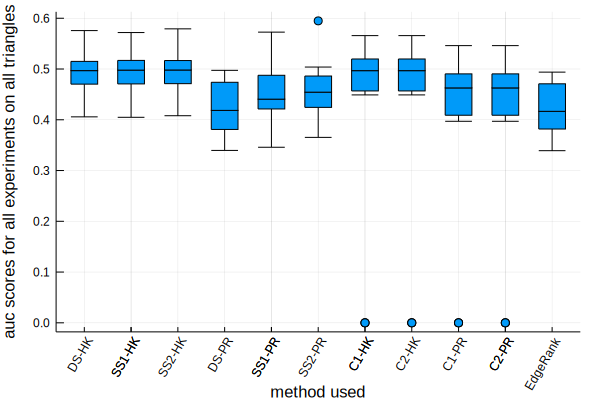

In [270]:
curaucvals = AUC
boxplot(["DS-HK" "SS1-HK" "SS2-HK" "DS-PR" "SS1-PR" "SS2-PR" "C1-HK" "C2-HK" "C1-PR" "C2-PR" "EdgeRank"],curaucvals, legend = false,color=1)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")
plot!(xrotation=60)

In [242]:
vi = 234
X = pair_prediction_alternate(Atrain,vi,myalpha,10)
vi_triangles = triangles(A,vi)
ei = Array{Int64}(undef,0)
ej = Array{Int64}(undef,0)
for tri in vi_triangles
    r,c,k = tri.v1,tri.v2,tri.v3
    push!(ei,c)
    push!(ej,k)
end
Xref = sparse(ei,ej,1,n,n)
Xref = max.(Xref,Xref')
neededset = setdiff(1:n,vi)
Xrefs = triu(Xref[neededset,neededset])
Xsol = triu(X[neededset,neededset])
tpr,fpr,auc = calc_AUC_new(Xrefs,Xsol); @show auc

auc = 0.88137308453682


0.88137308453682

In [138]:
v = ones(n)./n
X,x = edgeRank(A,v,myalpha,10)
@show argmax(x)
@show argmax(X)
sortperm(x,rev=true)

argmax(x) = 142
argmax(X) = CartesianIndex(382, 81)


500-element Array{Int64,1}:
 142
 249
 214
 254
 434
 155
  76
 382
 159
 469
 427
 473
 459
   ⋮
 196
 347
 197
 152
 167
 242
 373
 183
 403
 279
 363
 278

In [137]:
xpr = pagerank(A,myalpha)
argmax(xpr)
sortperm(xpr,rev=true)

500-element Array{Int64,1}:
 142
 249
 214
 434
 254
 155
  76
 159
 382
 469
 427
 473
 459
   ⋮
 196
 347
 197
 152
 167
 242
 373
 183
 403
 279
 363
 278

In [142]:
sortperm(xpr,rev=true)-sortperm(x,rev=true)

500-element Array{Int64,1}:
    0
    0
    0
  180
 -180
    0
    0
 -223
  223
    0
    0
    0
    0
    ⋮
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0